In [ ]:
#POS file(Train)
!gdown --id 1ah0GqnVFRYwkMZ0wjGzkDCvTyA8e4Rsq

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ah0GqnVFRYwkMZ0wjGzkDCvTyA8e4Rsq
To: /content/Dataset_A_POS_train.csv
100% 5.26M/5.26M [00:00<00:00, 236MB/s]


In [ ]:
#POS file(Test)
!gdown --id 1j_lyqgcMYBHxsh5EaUsVBOONi2j83ILZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j_lyqgcMYBHxsh5EaUsVBOONi2j83ILZ
To: /content/Dataset_A_POS_test.csv
100% 1.32M/1.32M [00:00<00:00, 80.9MB/s]


In [ ]:
#Glove File
!gdown --id 1EYDn8JgcHjeBnlqQfIWfSz60c3z_dEp4

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1EYDn8JgcHjeBnlqQfIWfSz60c3z_dEp4
From (redirected): https://drive.google.com/uc?id=1EYDn8JgcHjeBnlqQfIWfSz60c3z_dEp4&confirm=t&uuid=230c8f15-d4f1-4d7c-b6e5-c931e56cad1f
To: /content/glove.6B.300d.txt
100% 1.04G/1.04G [00:04<00:00, 220MB/s]


In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn tensorflow


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ast
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense, TimeDistributed, Dropout, Masking
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load CSV
train_df = pd.read_csv("/content/Dataset_A_POS_train.csv")
print(train_df.head(10))

   Sentence #                                           Sentence  \
0           1  AU officials reported fresh fighting Sunday , ...   
1           2  Also Saturday , in an unrelated development , ...   
2           3  They replied , " We would willingly have helpe...   
3           4          He said he has ordered an investigation .   
4           5  World famous Russian cellist and conductor , M...   
5           6  The Danish combat ship Absalon came to the sce...   
6           7  Police say the foreign envoys used their diplo...   
7           8  Calls for U.N. reform have increased in recent...   
8           9  In the fishing-rich West African nation of Gui...   
9          10  There has been no specific information on when...   

                                                 POS  
0  ['NNP', 'NNS', 'VBD', 'JJ', 'NN', 'NNP', ',', ...  
1  ['RB', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', ','...  
2  ['PRP', 'VBD', ',', '``', 'PRP', 'MD', 'RB', '...  
3  ['PRP', 'VBD', 'PRP', 'VBZ',

In [ ]:
#loading test(no peek and no EDA)
test_df = pd.read_csv("/content/Dataset_A_POS_test.csv")

EDA

In [ ]:
#Basic Infos
df=pd.read_csv("/content/Dataset_A_POS_train.csv")
print("First 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

print("\nTotal entries in each column:\n", df.count())
all_tags = []

for index in df.index:
    pos_tags = ast.literal_eval(df.loc[index, 'POS'])  # Safely evaluate the string as a list
    all_tags.extend(pos_tags)  # Add all tags from this row to the list

print("\nNumber of POS tags:", len(all_tags))
unique_tags = set(all_tags) # convert to set to get only unique values

print("\nUnique POS tags:", unique_tags)
print("\nTotal number of unique POS tags:", len(unique_tags))

First 5 rows:
    Sentence #                                           Sentence  \
0           1  AU officials reported fresh fighting Sunday , ...   
1           2  Also Saturday , in an unrelated development , ...   
2           3  They replied , " We would willingly have helpe...   
3           4          He said he has ordered an investigation .   
4           5  World famous Russian cellist and conductor , M...   

                                                 POS  
0  ['NNP', 'NNS', 'VBD', 'JJ', 'NN', 'NNP', ',', ...  
1  ['RB', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', ','...  
2  ['PRP', 'VBD', ',', '``', 'PRP', 'MD', 'RB', '...  
3  ['PRP', 'VBD', 'PRP', 'VBZ', 'VBN', 'DT', 'NN'...  
4  ['NNP', 'JJ', 'JJ', 'NN', 'CC', 'NN', ',', 'NN...  

Data types:
 Sentence #     int64
Sentence      object
POS           object
dtype: object

Null values:
 Sentence #    0
Sentence      0
POS           0
dtype: int64

Total entries in each column:
 Sentence #    19183
Sentence      19183
POS    

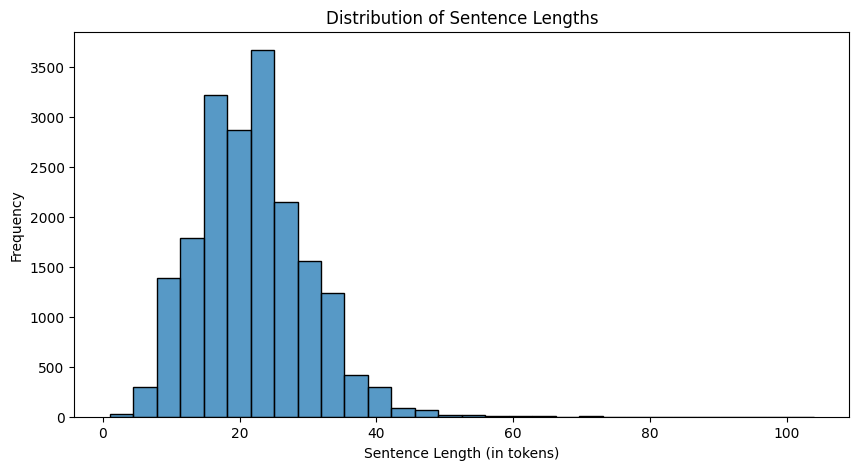

In [ ]:
# Sentence length distribution
df['sentence_length'] = df['Sentence'].apply(lambda x: len(x.split())) # Calculating word count for each sentence
sentence_lengths = df.groupby('Sentence')['sentence_length'].sum() # Grouping by 'Sentence' and summing word counts

plt.figure(figsize=(10, 5))
sns.histplot(sentence_lengths, bins=30, kde=False)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (in tokens)')
plt.ylabel('Frequency')
plt.show()




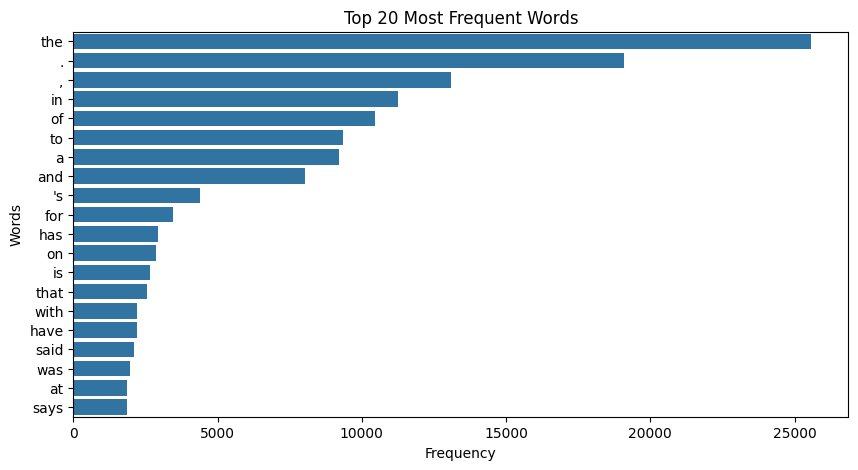

In [ ]:
# Most common words
df['Tokens'] = df['Sentence'].apply(lambda x: x.lower().split())

all_tokens = [token for tokens in df['Tokens'] for token in tokens]
tag_encoder = LabelEncoder()
tag_encoder.fit(all_tags)
tokenizer = Tokenizer(lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Tokens'])

token_counts = Counter(all_tokens)
top_words = token_counts.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=frequencies, y=words)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

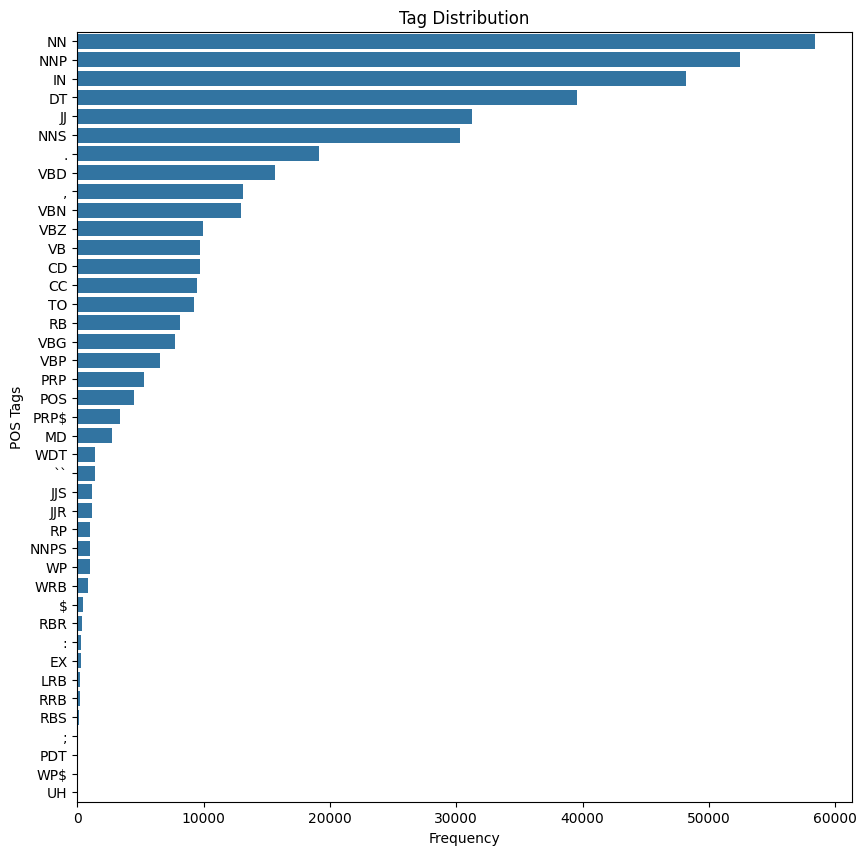

In [ ]:

# Most common tags
if not isinstance(df['POS'].iloc[0], list):#checks if list or string
    df['POS'] = df['POS'].apply(ast.literal_eval) # convert string to list
all_tags = [tag for tags in df['POS'] for tag in tags]

tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common()
tags, frequencies = zip(*top_tags)

plt.figure(figsize=(10, 10))
sns.barplot(x=frequencies, y=tags)
plt.title('Tag Distribution')
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.show()

In [ ]:
#checking for mismatch between len(sentence) and len(POS)

df['pos_count'] = df['POS'].apply(len) # calculate POS tag count
mismatches = df[df['pos_count'] != df['sentence_length']]

print("Number of mismatches:", len(mismatches))
if len(mismatches) > 0:
    print("Mismatched rows:")
    print(mismatches[['Sentence #', 'Sentence', 'POS', 'pos_count', 'sentence_length']])
else:
    print("No mismatches found.")


Number of mismatches: 3
Mismatched rows:
       Sentence #                                           Sentence  \
8626         8627  In a telephone interview to discuss the issues...   
10197       10198  " And I think they 'll want a one-stop shop in...   
12343       12344  He says they and about 300 party supporters ar...   

                                                     POS  pos_count  \
8626   [IN, DT, NN, NN, TO, VB, DT, NNS, IN, NN, ,, P...         54   
10197  [``, CC, PRP, VBP, PRP, MD, VB, DT, JJ, NN, IN...         38   
12343  [PRP, VBZ, PRP, CC, IN, CD, NN, NNS, VBP, VBG,...         29   

       sentence_length  
8626                52  
10197               37  
12343               28  


In [ ]:
#finding the infrequent tags for stratification

infrequent_tags = [tag for tag, count in tag_counts.items() if count < 41]

print("Tags with less than 41 occurrences:", infrequent_tags)

Tags with less than 41 occurrences: ['WP$', 'UH']


Pre Process The Data Set

In [ ]:
for df in [train_df , test_df ]:
    if not isinstance(df['POS'].iloc[0], list):
        df['POS'] = df['POS'].apply(ast.literal_eval) #It safely evaluates a string containing a Python literal or a container object. Unlike eval(), it only processes basic literals like strings, numbers, lists, tuples, dictionaries, booleans, and None. It raises an error if the input contains anything beyond these, making it significantly safer.
    df['Tokens'] = df['Sentence'].apply(lambda x: x.lower().split())

    # Prepare label encoder for POS tags
    all_tags = [tag for tags in df['POS'] for tag in tags]
    tag_encoder = LabelEncoder()
    tag_encoder.fit(all_tags)

    tokenizer = Tokenizer(lower=True, oov_token="<OOV>")
    tokenizer.fit_on_texts(df['Tokens'])

In [ ]:
#dropping the mismatched rows
for df in [train_df]:
    df = df.drop(mismatches.index)

In [ ]:
#removing infrequent tags for stratification
train_df['stratification_group'] = train_df['POS'].apply(lambda tags: any(tag in infrequent_tags for tag in tags))


In [ ]:
# Convert to sequences
def encode_and_pad(df, max_len):
    X = tokenizer.texts_to_sequences(df['Tokens'])
    y = [[tag_encoder.transform([t])[0] for t in tags] for tags in df['POS']]
    X_pad = pad_sequences(X, maxlen=max_len, padding='post')
    y_pad = pad_sequences(y, maxlen=max_len, padding='post')
    y_cat = to_categorical(y_pad, num_classes=len(tag_encoder.classes_))
    return X_pad, y_cat, y_pad

#padding done to match the  dimensions of every input text and length


MAX_LEN = max(train_df['Tokens'].apply(len))
vocab_size = len(tokenizer.word_index) + 1
tag_size = len(tag_encoder.classes_)


#train and val split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['stratification_group'])


X_train, y_train_cat, y_train_flat = encode_and_pad(train_df, MAX_LEN)
X_val, y_val_cat, y_val_flat = encode_and_pad(val_df, MAX_LEN)

#test_dataset
X_test, y_test_cat, y_test_flat = encode_and_pad(test_df, MAX_LEN)



In [ ]:
print(X_train)

[[  24   18   24 ...    0    0    0]
 [  24 1671    8 ...    0    0    0]
 [  37   99   17 ...    0    0    0]
 ...
 [   2  751  583 ...    0    0    0]
 [   2 2241   17 ...    0    0    0]
 [5667   23    8 ...    0    0    0]]


In [ ]:
#loading embedding for text
def load_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_embeddings('/content/glove.6B.300d.txt')
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
#using tensor slicing for faster
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
train_dataset = train_dataset.batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_cat))
val_dataset = val_dataset.batch(128)

#test
#creating tf dataset
test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_dataset = test_dataset.batch(128)

MODEL TRAINING

In [ ]:

def build_model(model_type="rnn"):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=MAX_LEN, trainable=False))

    if model_type == "rnn":
        model.add(SimpleRNN(128, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(64, return_sequences=True))

    elif model_type == "lstm":
        model.add(LSTM(128, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(64, return_sequences=True))

    elif model_type == "gru":
        model.add(GRU(128, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(GRU(64, return_sequences=True))

    elif model_type == "bilstm":
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(64, return_sequences=True)))

    model.add(Dropout(0.1))
    model.add(TimeDistributed(Dense(tag_size, activation="softmax")))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    models = {
        "RNN": build_model("rnn"),
        "LSTM": build_model("lstm"),
        "GRU": build_model("gru"),
        "BiLSTM": build_model("bilstm")
    }





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


TRAINING LOOP

In [ ]:


history = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    hist = model.fit(train_dataset, batch_size=128, epochs=50, validation_data=val_dataset, verbose=1)
    history[name] = hist


Training RNN...
Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 537ms/step - accuracy: 0.7541 - loss: 1.1882 - val_accuracy: 0.9194 - val_loss: 0.3228
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 520ms/step - accuracy: 0.9246 - loss: 0.2973 - val_accuracy: 0.9484 - val_loss: 0.1933
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 498ms/step - accuracy: 0.9484 - loss: 0.1947 - val_accuracy: 0.9596 - val_loss: 0.1481
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 573ms/step - accuracy: 0.9583 - loss: 0.1529 - val_accuracy: 0.9659 - val_loss: 0.1230
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 524ms/step - accuracy: 0.9638 - loss: 0.1298 - val_accuracy: 0.9703 - val_loss: 0.1045
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 530ms/step - accuracy: 0.9676 - loss: 0.1148 - val_accuracy: 0.9730 - val_loss: 0.0937
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 497ms/step - accuracy: 0.9704 - loss: 0.1040 - val_accuracy: 0.9750 - val_loss: 0.0856
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 59s 486ms/step - accuracy:

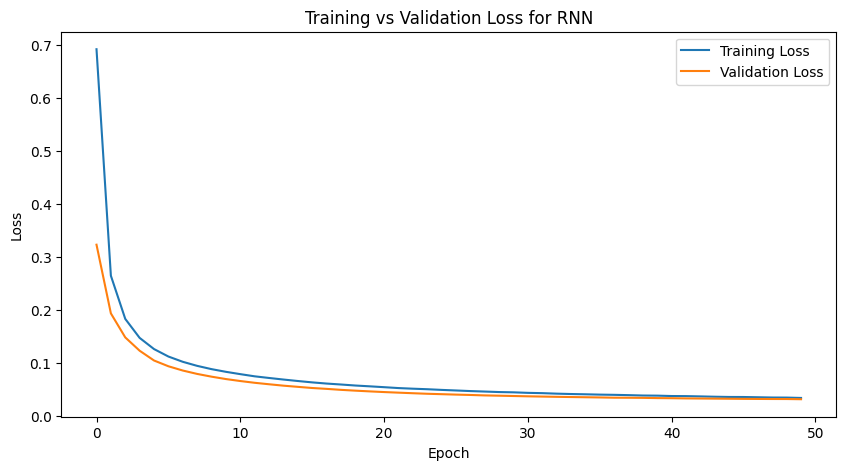

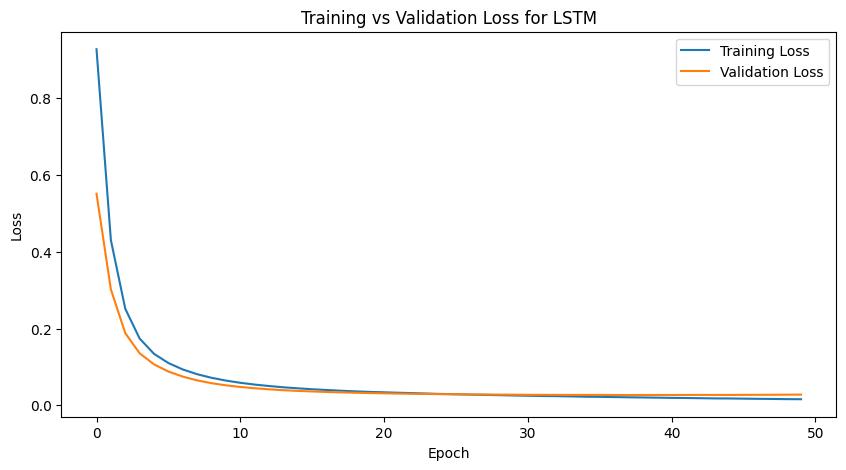

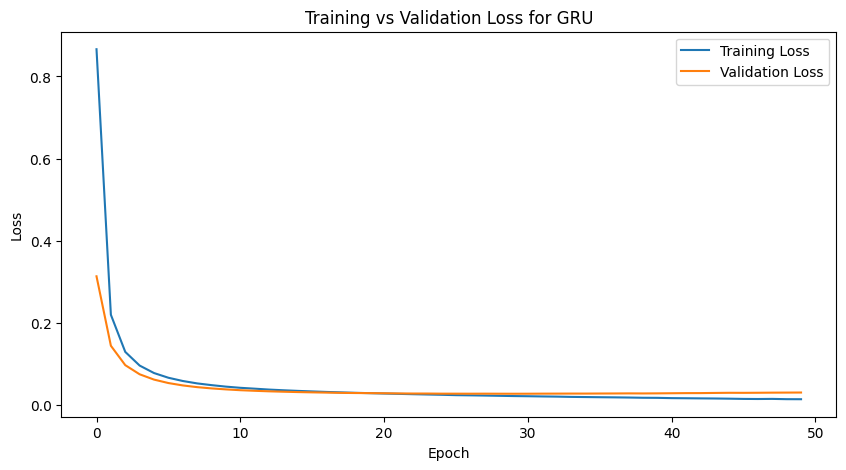

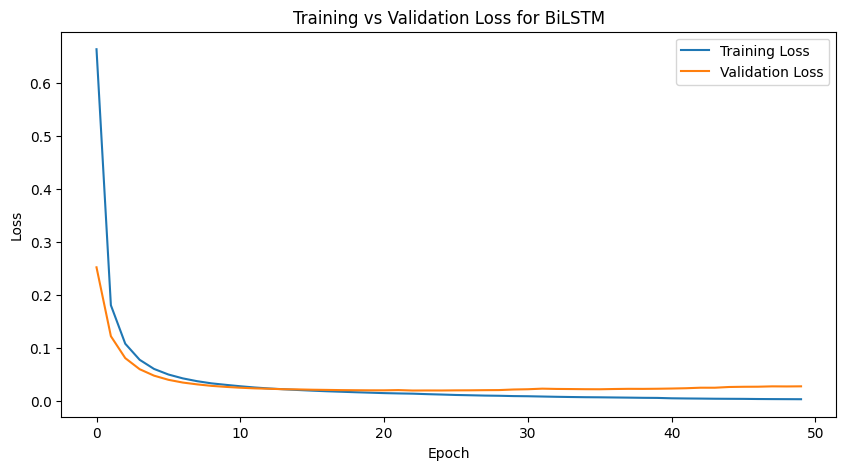

In [ ]:
for name, hist in history.items():
    plt.figure(figsize=(10, 5))
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Training vs Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Evaluation

120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step

=== RNN Evaluation ===
Accuracy: 0.9528891233707838
F1 Score (macro): 0.8782776410572876

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      2592
           .       1.00      1.00      1.00      3828
           :       0.63      0.72      0.67        67
           ;       1.00      1.00      1.00        19
          CC       1.00      0.99      1.00      1882
          CD       0.98      0.98      0.98      1978
          DT       1.00      1.00      1.00      7883
          EX       0.91      1.00      0.95        51
          IN       0.98      0.99      0.99      9487
          JJ       0.88      0.89      0.89      6180
         JJR       0.88      0.93      0.91       226
         JJS       0.96      0.97      0.96       226
         LRB       0.98      1.00      0.99        54
          MD       0.99      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


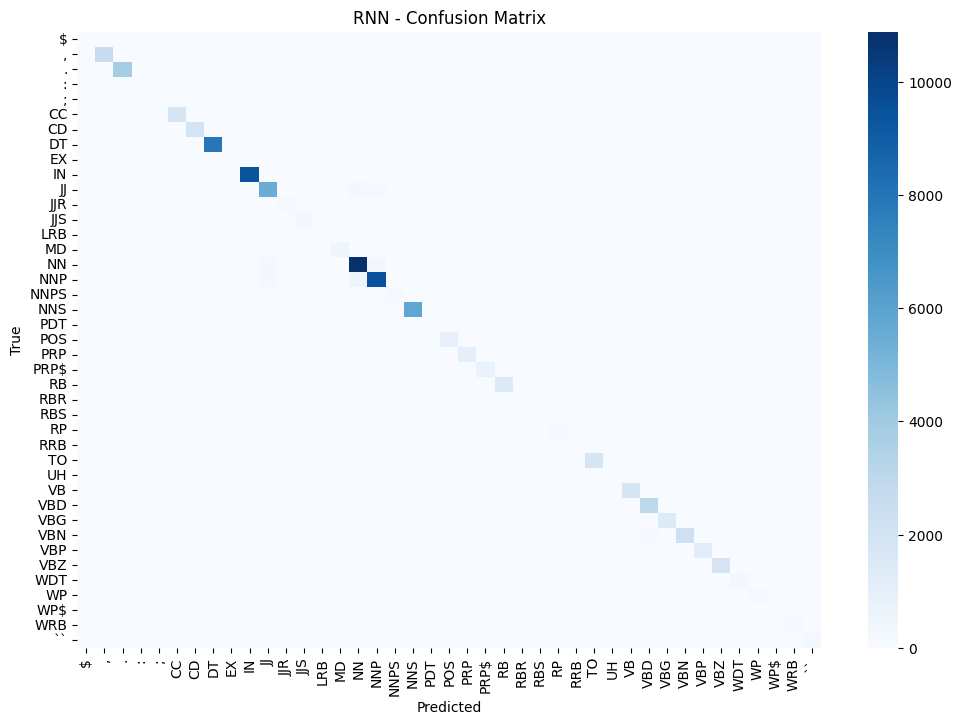

120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step

=== LSTM Evaluation ===
Accuracy: 0.9611506133167065
F1 Score (macro): 0.8755314858894886

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      2592
           .       1.00      1.00      1.00      3828
           :       0.66      0.84      0.74        67
           ;       1.00      1.00      1.00        19
          CC       1.00      1.00      1.00      1882
          CD       0.99      0.99      0.99      1978
          DT       1.00      1.00      1.00      7883
          EX       0.89      1.00      0.94        51
          IN       0.99      0.99      0.99      9487
          JJ       0.90      0.91      0.90      6180
         JJR       0.91      0.97      0.94       226
         JJS       0.95      0.96      0.96       226
         LRB       0.98      1.00      0.99        54
          MD       0.99      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

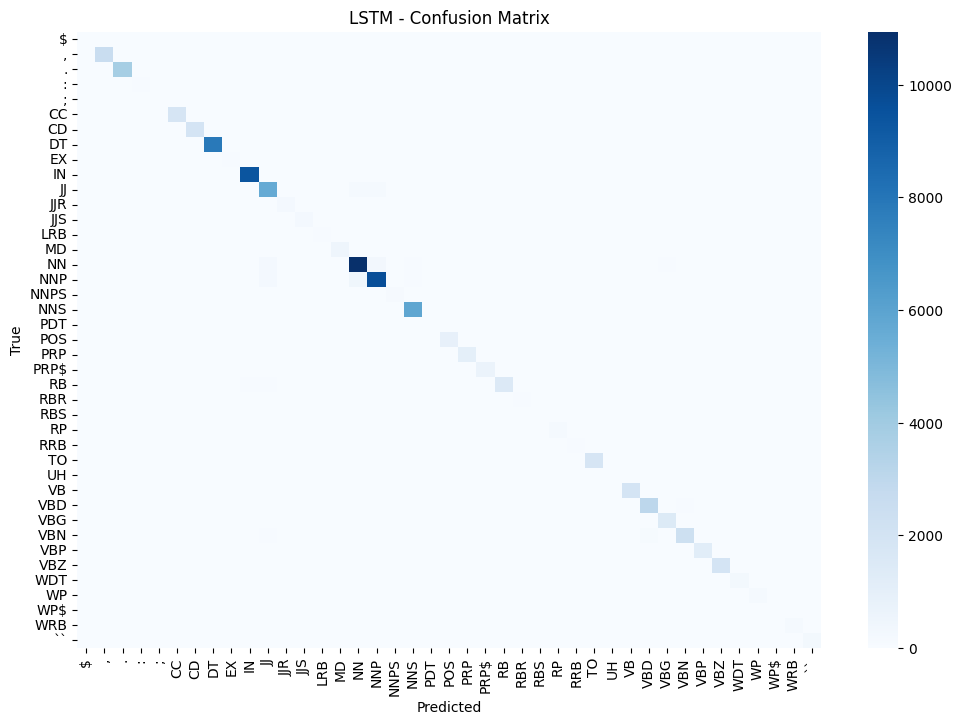

120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step

=== GRU Evaluation ===
Accuracy: 0.9599875298264967
F1 Score (macro): 0.8895310730153854

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      2592
           .       1.00      1.00      1.00      3828
           :       0.71      0.78      0.74        67
           ;       1.00      1.00      1.00        19
          CC       1.00      1.00      1.00      1882
          CD       0.99      0.99      0.99      1978
          DT       1.00      1.00      1.00      7883
          EX       0.93      1.00      0.96        51
          IN       0.99      0.99      0.99      9487
          JJ       0.89      0.91      0.90      6180
         JJR       0.91      0.92      0.92       226
         JJS       0.98      0.97      0.98       226
         LRB       1.00      1.00      1.00        54
          MD       1.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

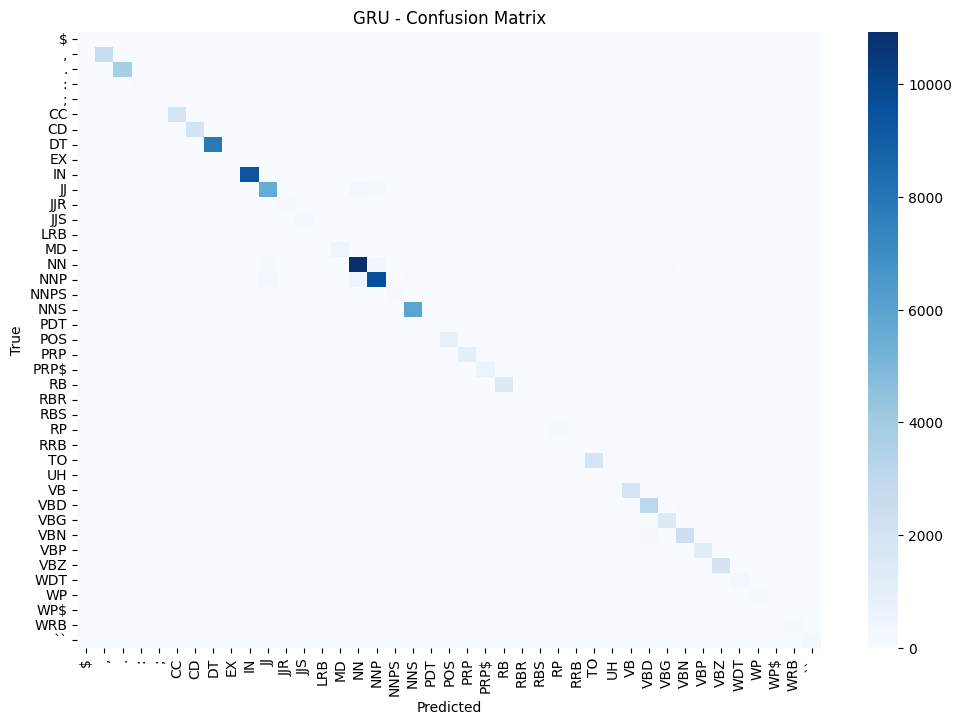

120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step

=== BiLSTM Evaluation ===
Accuracy: 0.9705272245470569
F1 Score (macro): 0.9265837644711561

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      2592
           .       1.00      1.00      1.00      3828
           :       0.85      0.84      0.84        67
           ;       1.00      1.00      1.00        19
          CC       1.00      1.00      1.00      1882
          CD       0.99      0.99      0.99      1978
          DT       1.00      1.00      1.00      7883
          EX       0.98      0.98      0.98        51
          IN       0.99      0.99      0.99      9487
          JJ       0.92      0.94      0.93      6180
         JJR       0.93      0.92      0.93       226
         JJS       0.97      0.98      0.97       226
         LRB       1.00      0.98      0.99        54
          MD       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


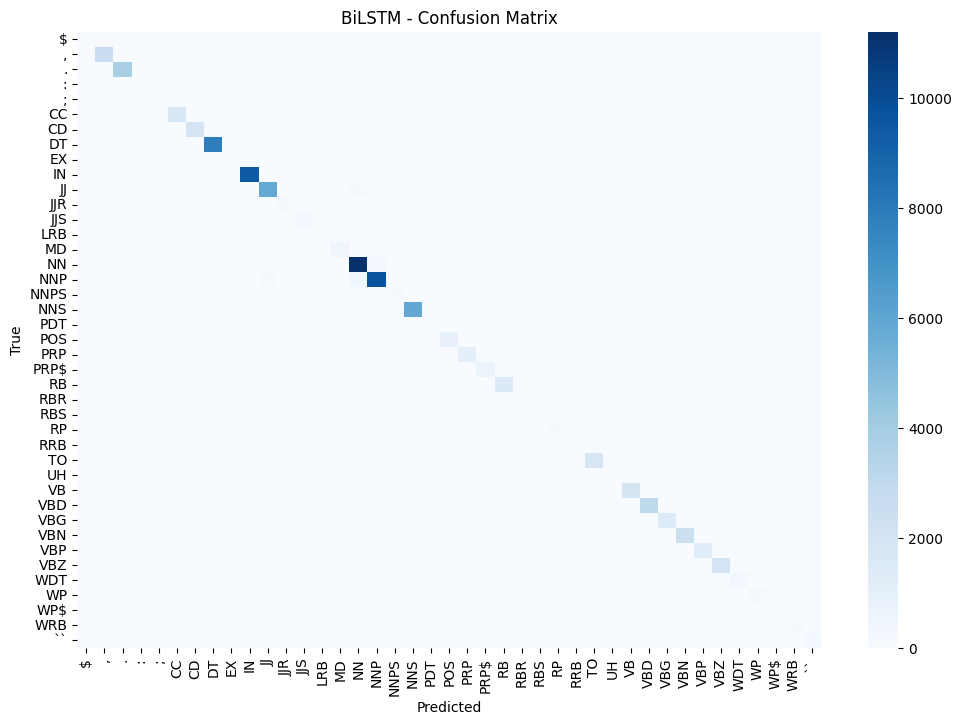

In [ ]:


def evaluate_model(name, model):
    y_pred = model.predict(X_val)
    y_pred_flat = np.argmax(y_pred, axis=-1).flatten()
    y_true_flat = y_val_flat.flatten()
    mask = y_true_flat > 0  # mask out padding
    y_pred_masked = y_pred_flat[mask]
    y_true_masked = y_true_flat[mask]

    print(f"\n=== {name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_true_masked, y_pred_masked))
    print("F1 Score (macro):", f1_score(y_true_masked, y_pred_masked, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true_masked, y_pred_masked, target_names=tag_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_true_masked, y_pred_masked)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, xticklabels=tag_encoder.classes_, yticklabels=tag_encoder.classes_, cmap="Blues", annot=False, fmt="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Evaluate each model
for name, model in models.items():
    evaluate_model(name, model)

Testing

150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== RNN Evaluation ===
Accuracy: 0.4178749928735676
F1 Score (macro): 0.2241249329594185
F1 Score (weighted): 0.41813626204726767

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      3314
           .       1.00      1.00      1.00      4789
           :       0.00      0.00      0.00        73
           ;       0.00      0.00      0.00        22
          CC       0.96      0.96      0.96      2474
          CD       0.19      0.19      0.19      2522
          DT       0.92      0.92      0.92      9797
          EX       0.00      0.00      0.00        75
          IN       0.69      0.68      0.69     12190
          JJ       0.13      0.14      0.13      7807
         JJR       0.00      0.00      0.00       291
         JJS       0.00      0.00      0.00       309
         LRB       0.00      0.00      0.00        67
          MD       0.00      0.00

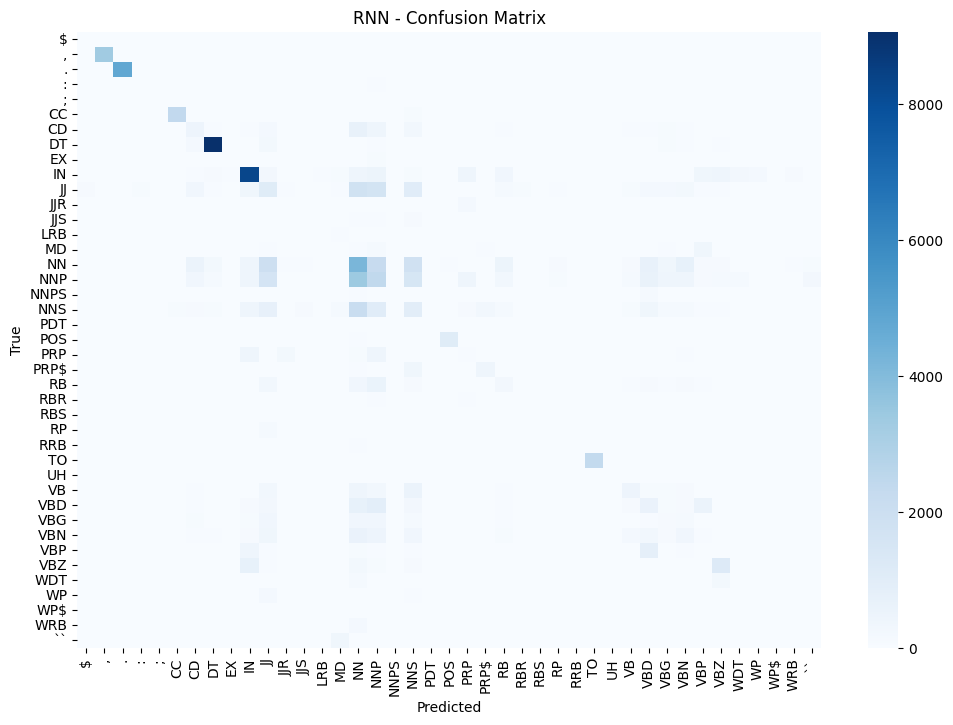

150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== LSTM Evaluation ===
Accuracy: 0.41606962999562913
F1 Score (macro): 0.223014174342704
F1 Score (weighted): 0.4163761066868752

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      3314
           .       1.00      1.00      1.00      4789
           :       0.00      0.00      0.00        73
           ;       0.00      0.00      0.00        22
          CC       0.96      0.96      0.96      2474
          CD       0.20      0.19      0.19      2522
          DT       0.92      0.92      0.92      9797
          EX       0.00      0.00      0.00        75
          IN       0.69      0.68      0.68     12190
          JJ       0.12      0.13      0.13      7807
         JJR       0.00      0.00      0.00       291
         JJS       0.00      0.00      0.00       309
         LRB       0.00      0.00      0.00        67
          MD       0.00      0.00

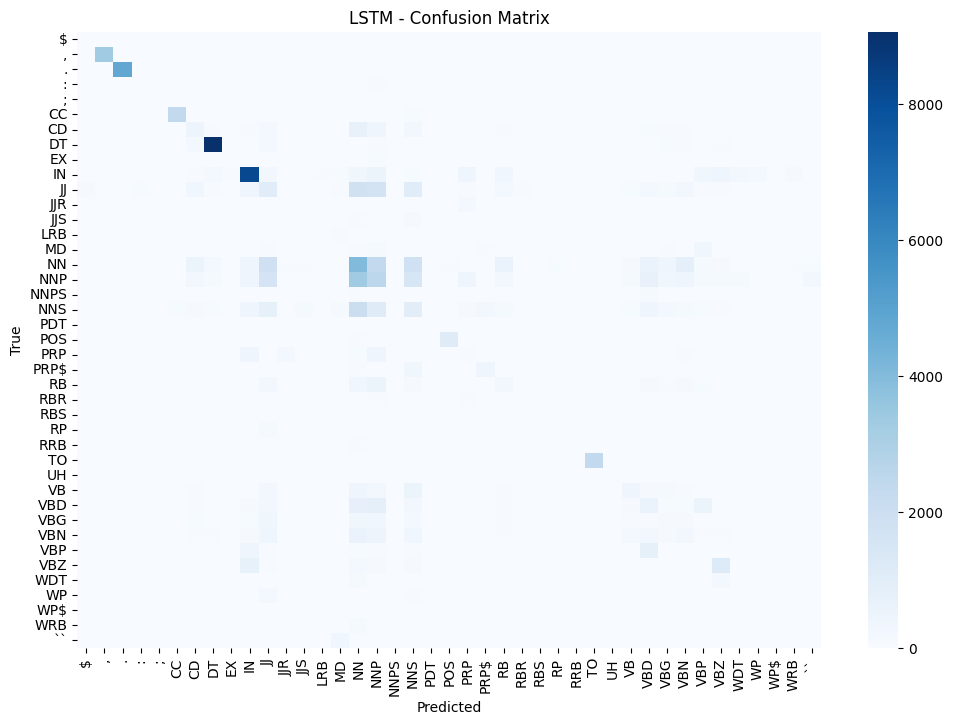

150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== GRU Evaluation ===
Accuracy: 0.4154235001235248
F1 Score (macro): 0.22298866440681028
F1 Score (weighted): 0.4158406089871915

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      3314
           .       1.00      1.00      1.00      4789
           :       0.00      0.00      0.00        73
           ;       0.00      0.00      0.00        22
          CC       0.95      0.96      0.96      2474
          CD       0.20      0.19      0.19      2522
          DT       0.91      0.92      0.92      9797
          EX       0.00      0.00      0.00        75
          IN       0.68      0.67      0.68     12190
          JJ       0.12      0.13      0.12      7807
         JJR       0.00      0.00      0.00       291
         JJS       0.00      0.00      0.00       309
         LRB       0.00      0.00      0.00        67
          MD       0.00      0.00

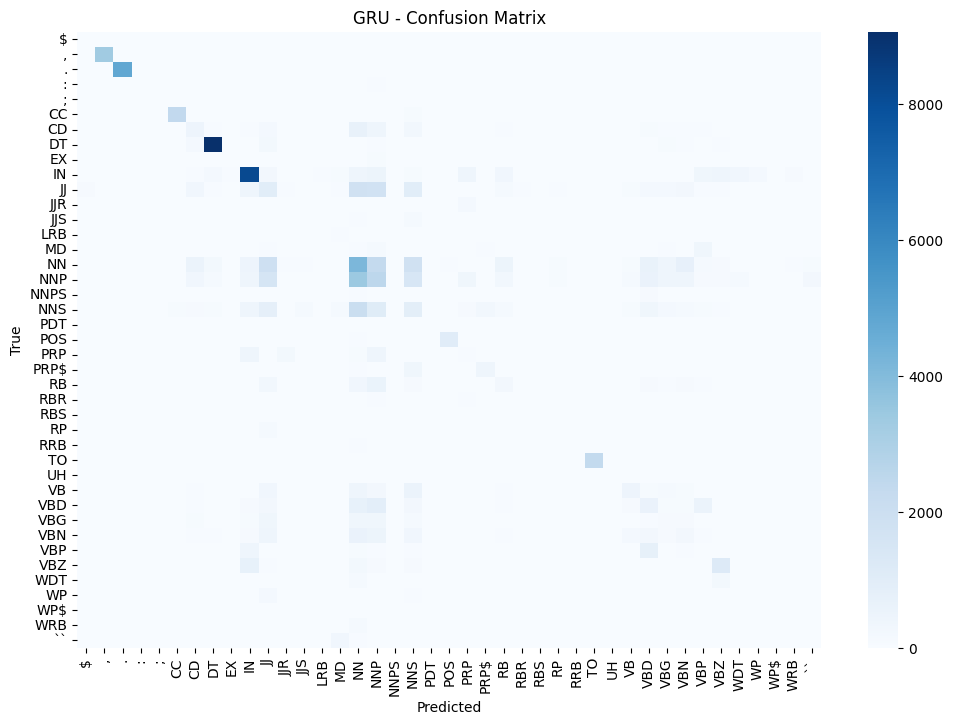

150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== BiLSTM Evaluation ===
Accuracy: 0.432260884437772
F1 Score (macro): 0.22812276705345463
F1 Score (weighted): 0.4305539986964237

Classification Report:
               precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
           ,       1.00      1.00      1.00      3314
           .       1.00      1.00      1.00      4789
           :       0.00      0.00      0.00        73
           ;       0.00      0.00      0.00        22
          CC       0.96      0.96      0.96      2474
          CD       0.20      0.19      0.19      2522
          DT       0.91      0.92      0.92      9797
          EX       0.00      0.00      0.00        75
          IN       0.70      0.69      0.70     12190
          JJ       0.16      0.15      0.15      7807
         JJR       0.00      0.00      0.00       291
         JJS       0.00      0.00      0.00       309
         LRB       0.00      0.00      0.00        67
          MD       0.00      0.

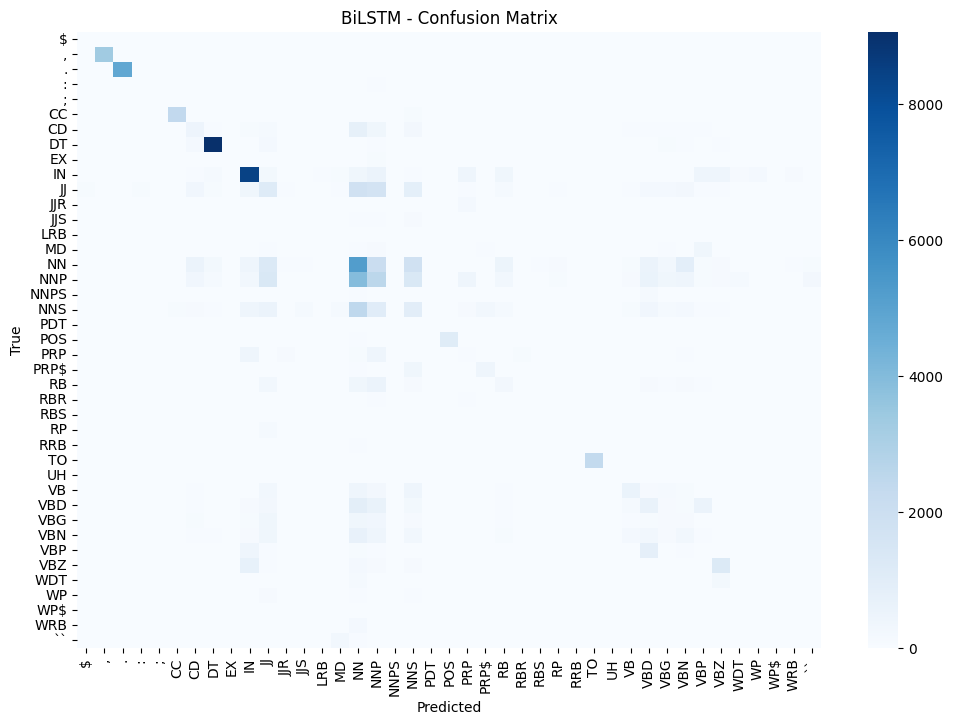

In [ ]:
 def evaluate_test_model(name, model, X_test, y_test_flat, num_predictions_to_show=5):  # Added X_test and y_test_flat as arguments
        y_pred = model.predict(X_test)
        # print(f"\n=== {name} Predictions (Showing {num_predictions_to_show} out of {len(test_df)}) ===")
        # Convert predictions to tag labels
        # predicted_tags = [[tag_encoder.inverse_transform([np.argmax(tag)])[0] for tag in seq] for seq in y_pred]
        # for i, sentence in enumerate(test_df['Sentence']):
        #     if i >= num_predictions_to_show:
        #         break
        #     print(f"Sentence: {sentence}")
        #     print(f"Predicted POS tags: {predicted_tags[i][:len(test_df['Tokens'][i])]}")  # Print tags only for the sentence length
        #     print("-" * 20)



        y_pred_flat = np.argmax(y_pred, axis=-1).flatten()
        y_true_flat = y_test_flat.flatten()
        mask = y_true_flat > 0  # mask out padding
        y_pred_masked = y_pred_flat[mask]
        y_true_masked = y_true_flat[mask]

        # Metrics
        acc = accuracy_score(y_true_masked, y_pred_masked)
        f1_macro = f1_score(y_true_masked, y_pred_masked, average='macro')
        f1_weighted = f1_score(y_true_masked, y_pred_masked, average='weighted')
        report = classification_report(y_true_masked, y_pred_masked, target_names=tag_encoder.classes_)

        # Append scores to DataFrame
        scores_df.loc[len(scores_df)] = {
            'Model': name,
            'Accuracy': acc,
            'F1 Score (macro)': f1_macro,
            'F1 Score (weighted)': f1_weighted,
            'Classification Report': report
        }

        # Print metrics
        print(f"\n=== {name} Evaluation ===")
        print("Accuracy:", acc)
        print("F1 Score (macro):", f1_macro)
        print("F1 Score (weighted):", f1_weighted)
        print("\nClassification Report:\n", report)

        # Confusion matrix
        cm = confusion_matrix(y_true_masked, y_pred_masked)
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, xticklabels=tag_encoder.classes_, yticklabels=tag_encoder.classes_, cmap="Blues", annot=False, fmt="d")
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()


# Create a Pandas DataFrame from the scores dictionary
scores_df = pd.DataFrame(columns=[
    'Model',
    'Accuracy',
    'F1 Score (macro)',
    'F1 Score (weighted)',
    'Classification Report'
])
# Evaluate each model
for name, model in models.items():
    evaluate_test_model(name, model, X_test, y_test_flat)




Comparison of models

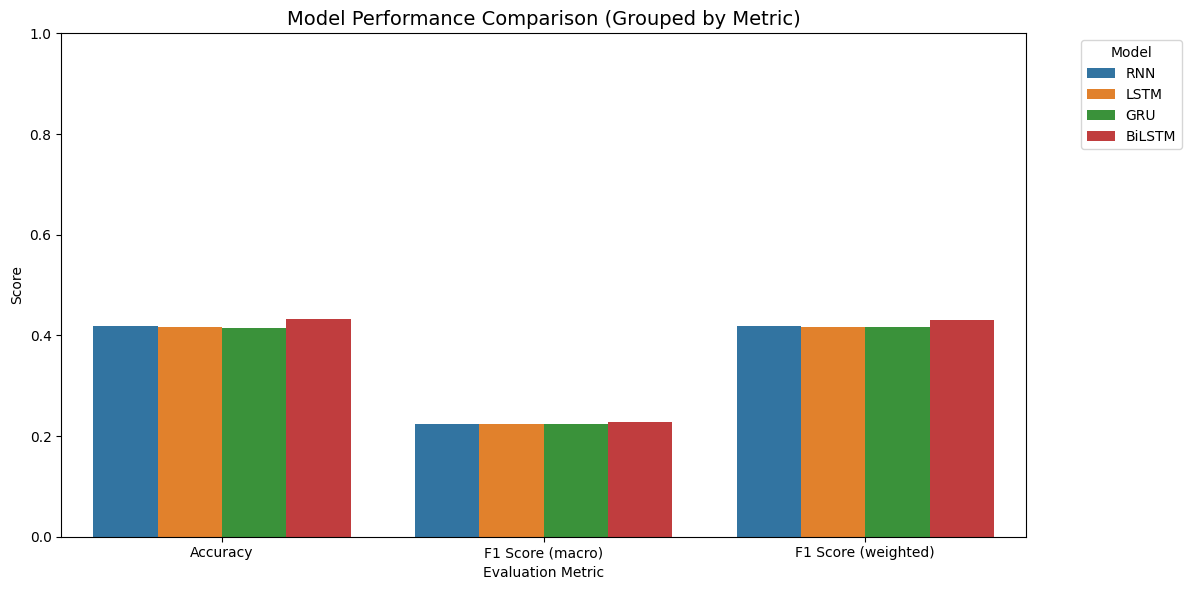

In [ ]:
# Drop 'Classification Report' (not numerical) for plotting
plot_df = scores_df.drop(columns=['Classification Report'])

# Melt into long format for Seaborn
scores_df_melted = plot_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

#grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=scores_df_melted)
plt.title('Model Performance Comparison (Grouped by Metric)', fontsize=14)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


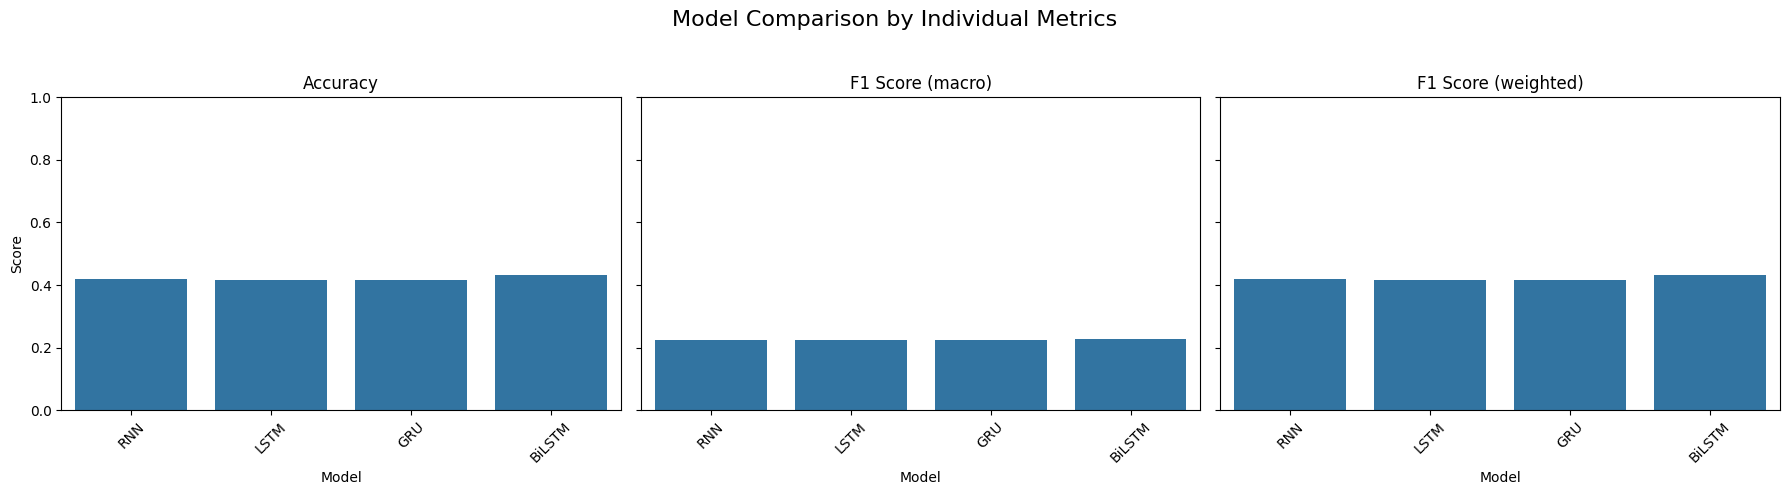

In [ ]:
#per metric chart
metrics = scores_df_melted['Metric'].unique()
fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 5), sharey=True)

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y='Score', data=scores_df_melted[scores_df_melted['Metric'] == metric], ax=axes[i])
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Model Comparison by Individual Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

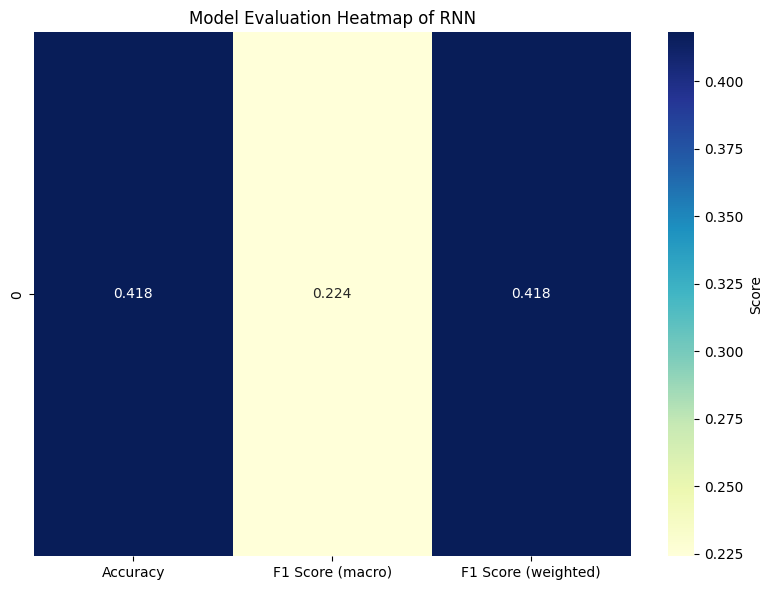

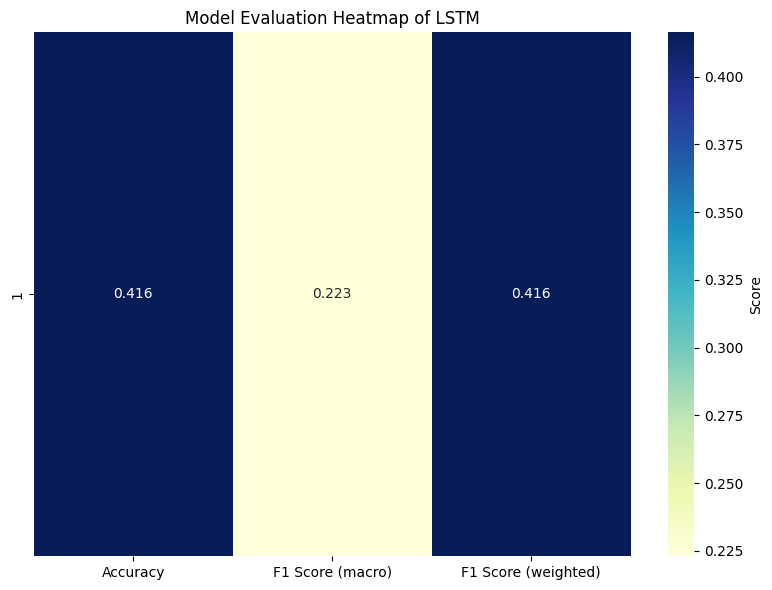

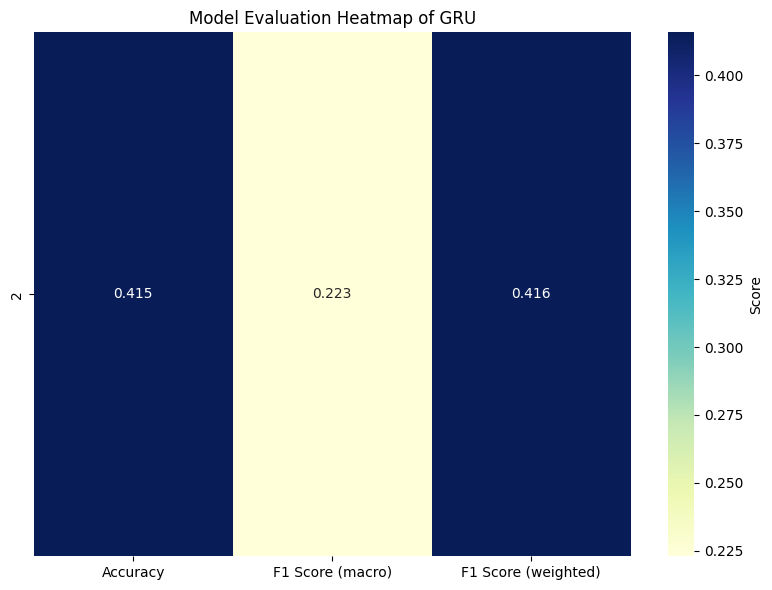

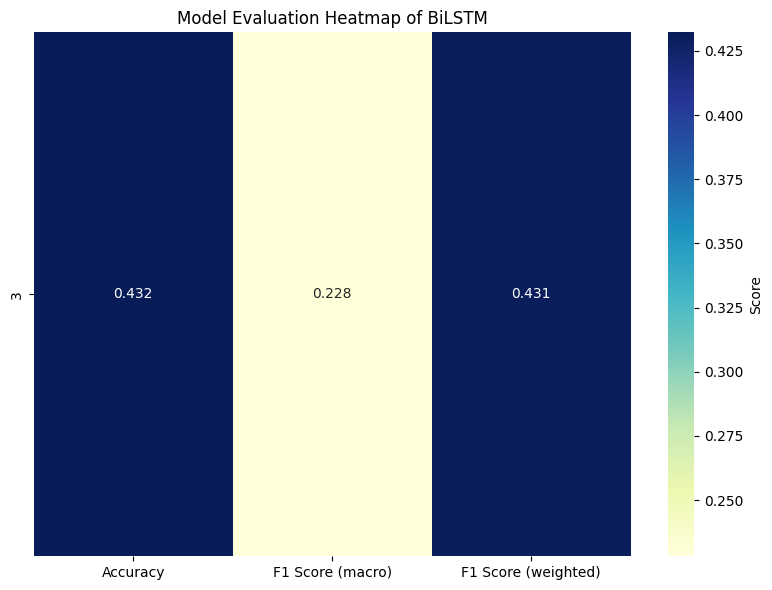

In [ ]:
def heatmap_plot(model_name):
    heatmap_data = plot_df[plot_df['Model'] == model_name].drop(columns=['Model'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".3f", cbar_kws={'label': 'Score'})
    plt.title(f'Model Evaluation Heatmap of {model_name}')
    plt.tight_layout()
    plt.show()
for name, model in models.items():
    heatmap_plot(name)